In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
data_prcp = engine.execute("SELECT * from Measurement WHERE date >= '2016-08-23' ")
for measurement in data_prcp:
    print(measurement)


(2364, 'USC00519397', '2016-08-23', 0.0, 81.0)
(2365, 'USC00519397', '2016-08-24', 0.08, 79.0)
(2366, 'USC00519397', '2016-08-25', 0.08, 80.0)
(2367, 'USC00519397', '2016-08-26', 0.0, 79.0)
(2368, 'USC00519397', '2016-08-27', 0.0, 77.0)
(2369, 'USC00519397', '2016-08-28', 0.01, 78.0)
(2370, 'USC00519397', '2016-08-29', 0.0, 78.0)
(2371, 'USC00519397', '2016-08-30', 0.0, 79.0)
(2372, 'USC00519397', '2016-08-31', 0.13, 80.0)
(2373, 'USC00519397', '2016-09-01', 0.0, 81.0)
(2374, 'USC00519397', '2016-09-02', 0.0, 80.0)
(2375, 'USC00519397', '2016-09-03', 0.0, 79.0)
(2376, 'USC00519397', '2016-09-04', 0.03, 75.0)
(2377, 'USC00519397', '2016-09-05', None, 79.0)
(2378, 'USC00519397', '2016-09-06', None, 76.0)
(2379, 'USC00519397', '2016-09-07', 0.05, 76.0)
(2380, 'USC00519397', '2016-09-08', 0.0, 80.0)
(2381, 'USC00519397', '2016-09-09', 0.03, 79.0)
(2382, 'USC00519397', '2016-09-10', 0.0, 78.0)
(2383, 'USC00519397', '2016-09-11', 0.05, 76.0)
(2384, 'USC00519397', '2016-09-12', 0.0, 78.0)
(23

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
data_date_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >='2016-08-23').group_by(Measurement.date).all()
data_date_prcp

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(data_date_prcp, columns=["Date","Precipitation"])
prcp_df.set_index('Date', inplace=True)
prcp_df.head()


,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


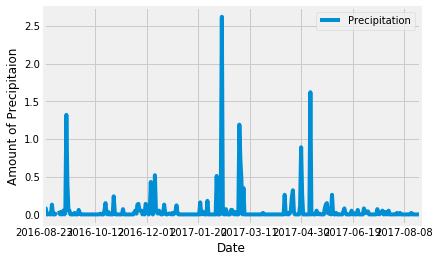

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot()
plt.ylabel("Amount of Precipitaion")
plt.xlabel("Date")
plt.savefig("Year_to_Date_Precipitation.png")
plt.show()

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data for the last 12 months
prcp_df.describe()

,Precipitation
count,364.000000
mean,0.048709
std,0.204930
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


In [15]:
#all precipitation df
data_prcp = session.query(Measurement.date, Measurement.prcp).group_by(Measurement.date).all()
data_prcp
all_prcp_df = pd.DataFrame(data_prcp, columns=["Date","Precipitation"])
all_prcp_df.set_index('Date', inplace=True)
all_prcp_df.head()

,Precipitation
Date,
2010-01-01,0.08
2010-01-02,0.00
2010-01-03,0.00
2010-01-04,0.00
2010-01-05,0.00


In [16]:
# All precipition summary statistics
all_prcp_df.describe()

,Precipitation
count,2753.000000
mean,0.053814
std,0.240275
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,4.940000


In [17]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.station).count()
station_count

9

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?

active_stations= session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).all()
active_stations

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [19]:
# List the stations and the counts in descending order # REF: session.query(Dow.date).order_by(Dow.date.desc()).first() 
DESC_COUNTS= session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
            order_by(func.count(Measurement.tobs).desc()).all()
DESC_COUNTS

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
HIGHEST_active_station =session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                        filter(Measurement.station == "USC00519281").all()
HIGHEST_active_station

[(54.0, 85.0, 71.66378066378067)]

In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
HAS_YTD = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >='2016-08-23').\
filter(Measurement.station == "USC00519281").all()
HAS_YTD

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [22]:
HAS_YTD_df = pd.DataFrame(HAS_YTD, columns=["Date","Precipitation"])
HAS_YTD_df

,Date,Precipitation
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


In [23]:
HAS_YTD_df.describe()

,Precipitation
count,352.000000
mean,73.107955
std,4.733315
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


In [24]:
# n= HAS_YTD["Precipitation"]
# np_hist = HAS_YTD_df





# plt.figure(figsize=[10,8])
# n, bins, patches = plt.hist(x=np_hist, bins=12, color='#0504aa',alpha=0.7, rwidth=0.85)
# plt.grid(axis='y', alpha=0.75)
# plt.xlabel('Value',fontsize=15)
# plt.ylabel('Frequency',fontsize=15)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.ylabel('Frequency',fontsize=15)
# plt.title('Histogram',fontsize=15)
# plt.show()

In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [26]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2011-02-28', '2011-03-05'))

[(61.0, 69.75510204081633, 75.0)]


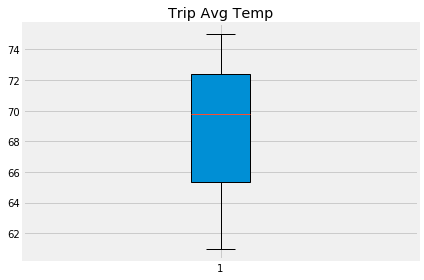

In [27]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
tat= calc_temps('2011-02-28', '2011-03-05')

fig, ax = plt.subplots()

x = range(len(tat))
ax.boxplot(tat, patch_artist=True)
ax.set_title('Trip Avg Temp')
fig.tight_layout()
plt.show()

In [30]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching date
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

T_A_Prcp = session.query(Station.station, Station.name,Station.latitude,Station.longitude,Station.elevation,func.sum(Measurement.tobs)).\
                        group_by(Station.station).\
                        order_by(func.sum(Measurement.tobs).desc()).\
                        filter(Measurement.date >= '2012-02-28').filter(Measurement.date <= '2012-03-05').all()
T_A_Prcp

[('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  3896.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 3896.0),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  3896.0),
 ('USC00518838',
  'UPPER WAHIAWA 874.3, HI US',
  21.4992,
  -158.0111,
  306.6,
  3896.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 3896.0),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  3896.0),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  3896.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 3896.0),
 ('USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  3896.0)]